1. Task 소개 (배경, 목적 등)

- 배경
- 대규모 다국적 기업(MNC)은 직원 승진을 결정할 때 다양한 요인을 고려해야 한다. 현재의 승진 프로세스는 추천과 과거 성과를 바탕으로 직원들을 선정하고, 각 수직 부문에서 필요한 기술에 따라 별도의 교육 및 평가 프로그램을 진행하는 방식이다. 프로그램 종료 후에는 교육 성과, KPI 완료율 등의 다양한 요소를 기반으로 승진 여부가 결정된다. 그러나 이 프로세스는 최종 승진 발표까지 시간이 걸려 새로운 역할로의 전환이 지연되는 문제가 있다.
- 목적
- 따라서, 이 과제의 목적은 머신 러닝을 활용하여 승진 가능성이 높은 직원을 사전에 예측하는 것이다. 이를 통해 회사는 승진 사이클을 가속화하고, 적시에 적합한 인재를 새로운 역할로 준비시킬 수 있다. 제공된 데이터셋을 활용하여 특정 체크포인트에서 승진 가능성을 예측하고, 이를 바탕으로 최종 승진을 결정하기 위한 모델을 개발해야 한다.

In [4]:
import pandas as pd
import numpy as np

In [5]:
train_data = pd.read_csv("C:/Users/windows/Desktop/데이터사이언스 기말 과제/train_LZdllcl.csv")
test_data = pd.read_csv('C:/Users/windows/Desktop/데이터사이언스 기말 과제/test_2umaH9m.csv')

In [6]:
train_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [7]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [12]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
test_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [9]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [13]:
# getting their shapes
print("Shape of train :", train_data.shape)
print("Shape of test :", test_data.shape)

Shape of train : (54808, 14)
Shape of test : (23490, 13)


데이터 탐색

In [19]:
train_data.employee_id.value_counts()

employee_id
65438    1
16223    1
38250    1
68086    1
78080    1
        ..
38645    1
76563    1
46788    1
75029    1
51526    1
Name: count, Length: 54808, dtype: int64

결측치 확인

In [16]:
# 결측치 확인
missing_values = train_data.isnull().sum()
missing_values

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [17]:
# 결측치가 있는 변수 출력
missing_values[missing_values > 0]

education               2409
previous_year_rating    4124
dtype: int64

In [ ]:
import seaborn as sns
sns.countplot(x='Promoted', data=test_data)

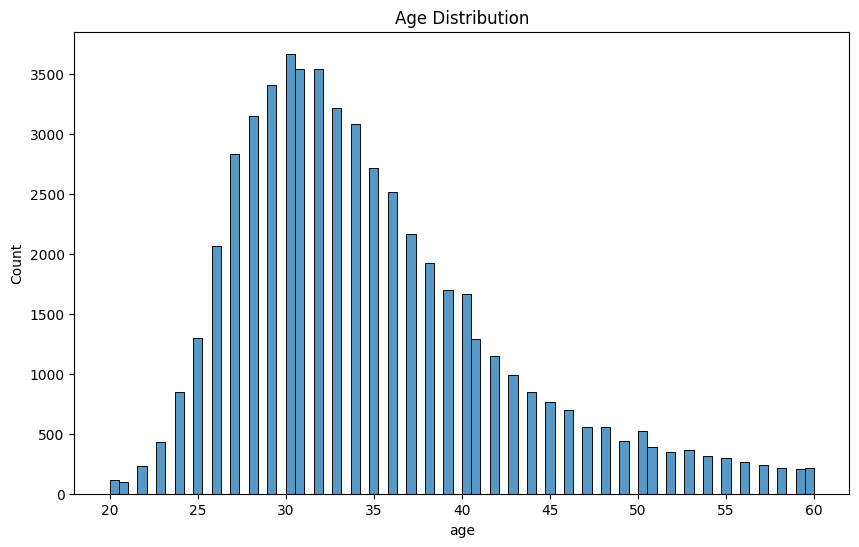

In [52]:
# 주요 변수의 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns

# 나이 분포
plt.figure(figsize=(10, 6))
sns.histplot(train_data['age'])
plt.title('Age Distribution')
plt.show()

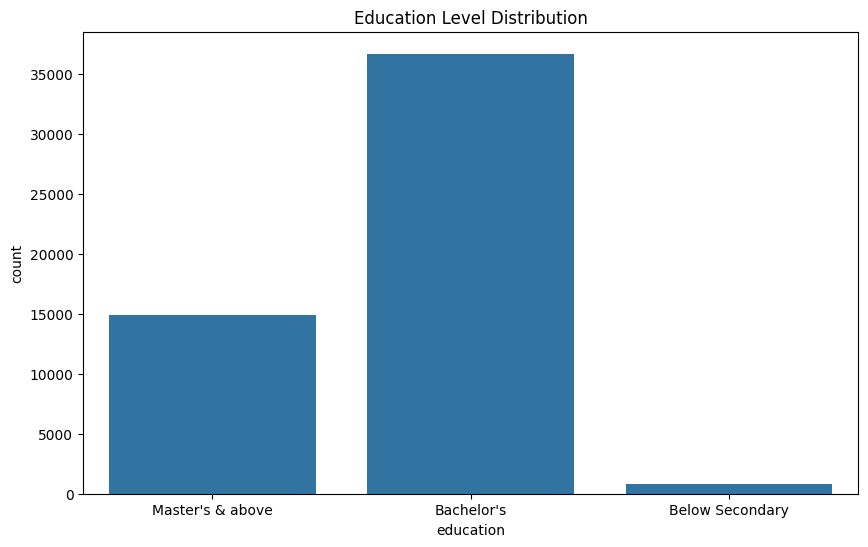

In [53]:
# 교육 수준 분포
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='education')
plt.title('Education Level Distribution')
plt.show()

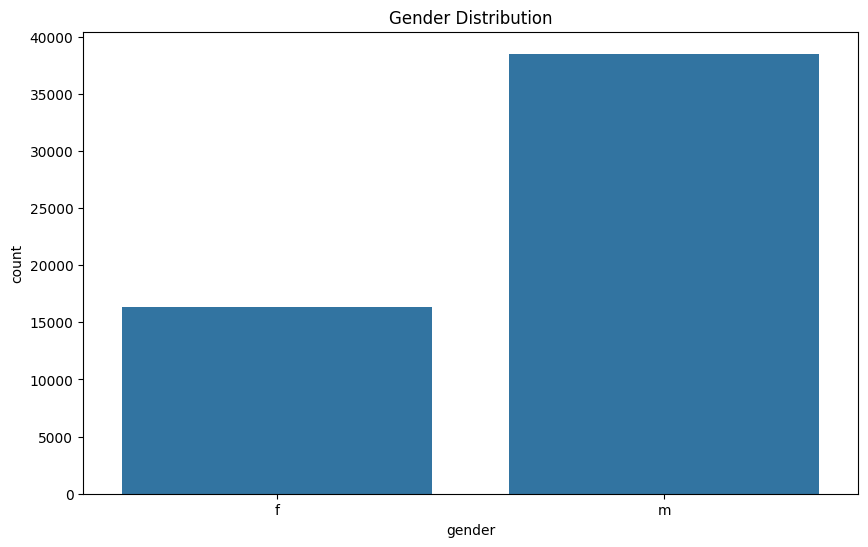

In [54]:
# 성별 분포
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='gender')
plt.title('Gender Distribution')
plt.show()

승진 여부(is_promoted)에 따른 주요 변수의 분포를 비교하여, 어떤 변수들이 승진에 영향을 미치는지 확인

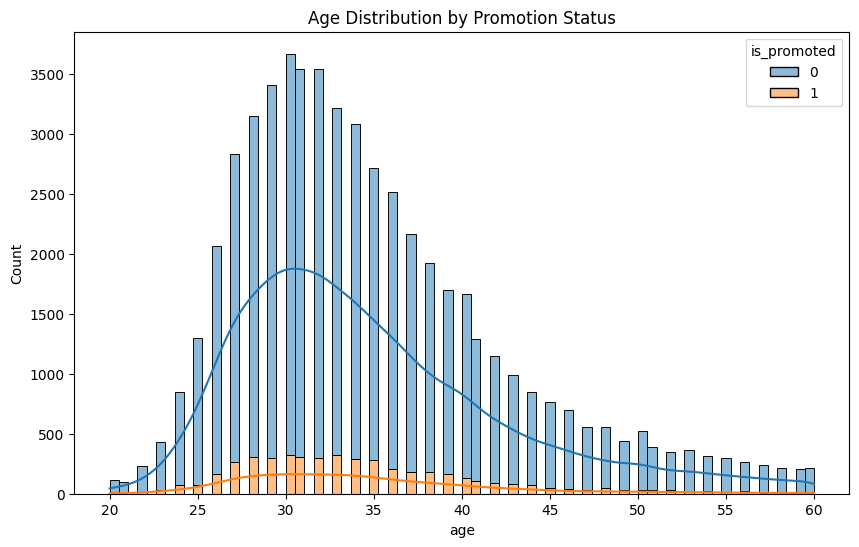

In [55]:
# 승진 여부에 따른 나이 분포
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='age', hue='is_promoted', kde=True, multiple="stack")
plt.title('Age Distribution by Promotion Status')
plt.show()

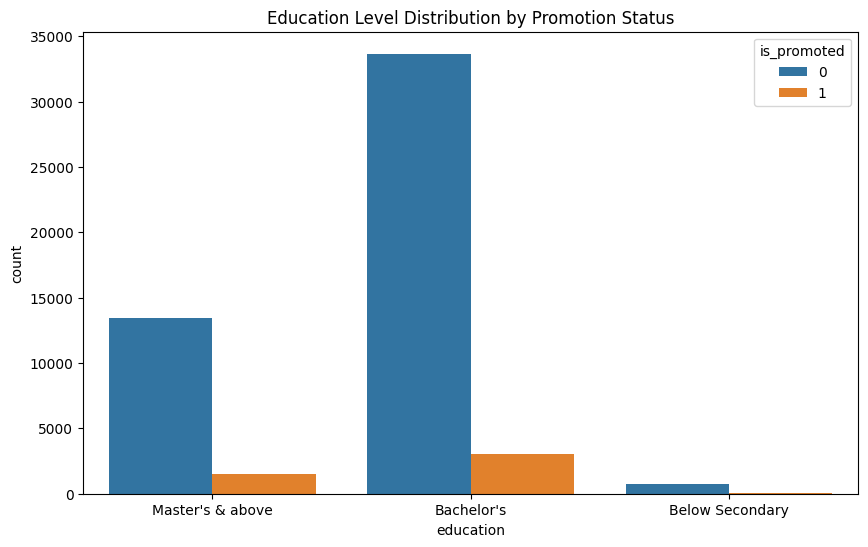

In [56]:
# 승진 여부에 따른 교육 수준 분포
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='education', hue='is_promoted')
plt.title('Education Level Distribution by Promotion Status')
plt.show()

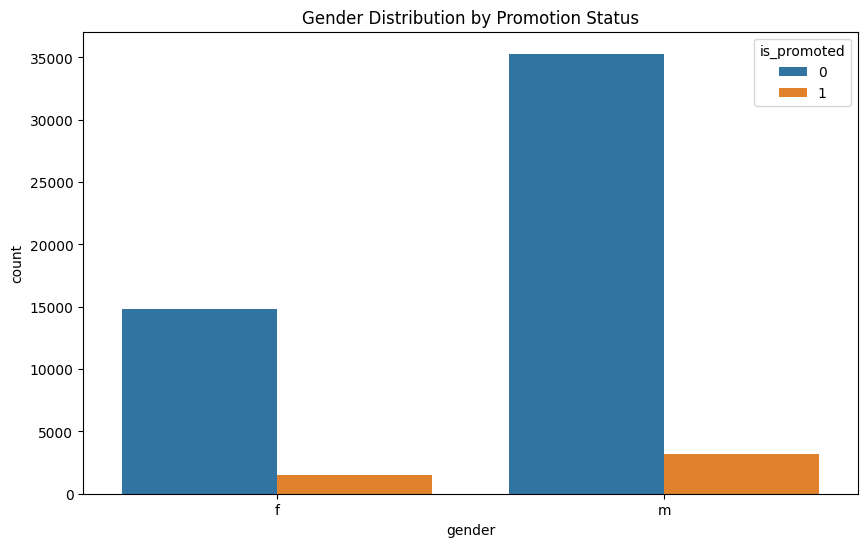

In [57]:
# 승진 여부에 따른 성별 분포
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='gender', hue='is_promoted')
plt.title('Gender Distribution by Promotion Status')
plt.show()

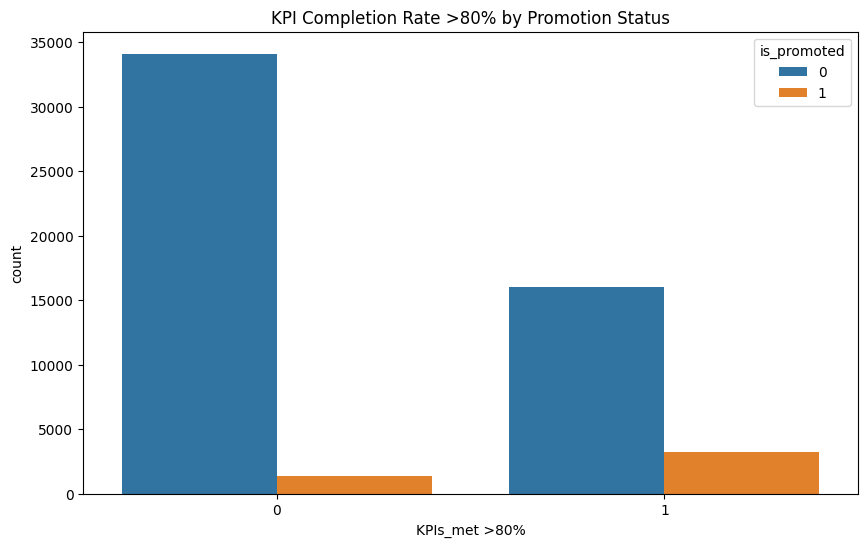

In [58]:
# 승진 여부에 따른 KPI 완료율
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='KPIs_met >80%', hue='is_promoted')
plt.title('KPI Completion Rate >80% by Promotion Status')
plt.show()

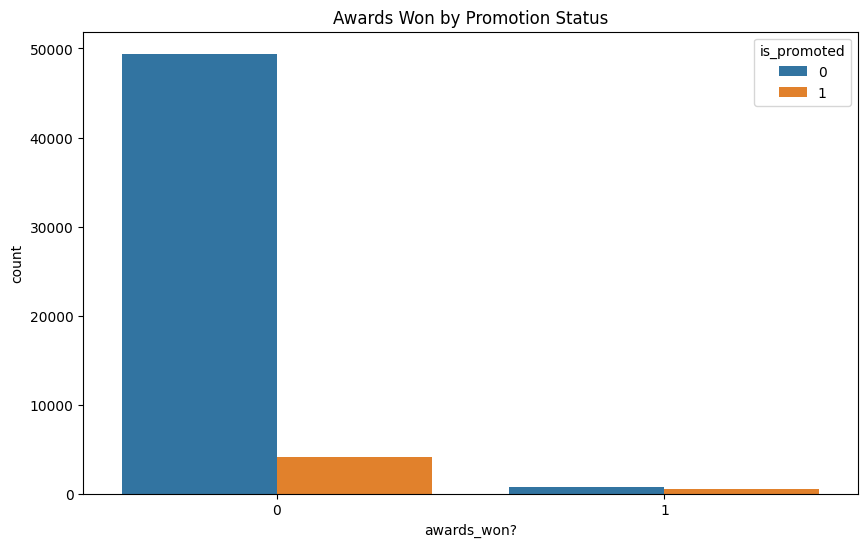

In [59]:
# 승진 여부에 따른 수상 여부
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='awards_won?', hue='is_promoted')
plt.title('Awards Won by Promotion Status')
plt.show()

범주형 변수를 인코딩

변수 간 상관관계 분석

Data Preprocessing

In [60]:
# combining the data for data prep
test_data['is_promoted']=np.nan
train_data['data']='train'
test_data['data']='test'
train=train_data[train_data.columns]
test=test_data[train_data.columns]

combined_data = pd.concat([train,test], sort = False , ignore_index= True)

In [61]:
combined_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train


In [62]:
#Missing values
combined_data.isna().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
data                        0
dtype: int64

In [63]:
combined_data.education.value_counts()

education
Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: count, dtype: int64

In [64]:
#filling in education with the maximum value(mode)
combined_data['education'] = combined_data['education'].fillna("Bachelor's")

In [65]:
combined_data.education.value_counts()

education
Bachelor's          55690
Master's & above    21429
Below Secondary      1179
Name: count, dtype: int64

In [66]:
combined_data.education.isna().sum()

0

In [67]:
combined_data.previous_year_rating.value_counts()

previous_year_rating
3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: count, dtype: int64

In [68]:
#filling in previous_year_rating with the median

combined_data['previous_year_rating'] = combined_data['previous_year_rating'].fillna(combined_data['previous_year_rating'].median())

In [69]:
combined_data.previous_year_rating.value_counts()

previous_year_rating
3.0    32475
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: count, dtype: int64

데이터 인코딩

In [70]:
#Feature hashing region

unique_region = np.unique(combined_data[['region']])
print("Total unique regions:", len(unique_region))
print(unique_region)

Total unique regions: 34
['region_1' 'region_10' 'region_11' 'region_12' 'region_13' 'region_14'
 'region_15' 'region_16' 'region_17' 'region_18' 'region_19' 'region_2'
 'region_20' 'region_21' 'region_22' 'region_23' 'region_24' 'region_25'
 'region_26' 'region_27' 'region_28' 'region_29' 'region_3' 'region_30'
 'region_31' 'region_32' 'region_33' 'region_34' 'region_4' 'region_5'
 'region_6' 'region_7' 'region_8' 'region_9']


In [71]:
from sklearn.feature_extraction import FeatureHasher
import pandas as pd

# 문자열을 리스트 형태로 변환
region_list = combined_data['region'].apply(lambda x: [x])

# FeatureHasher 인스턴스 생성
fh = FeatureHasher(n_features=6, input_type='string')

# fit_transform을 사용하여 해싱된 피처 생성
hashed_features = fh.fit_transform(region_list)

# 배열로 변환
hashed_features = hashed_features.toarray()

# DataFrame으로 변환
hashed_features_df = pd.DataFrame(hashed_features)

print(hashed_features_df)

         0    1    2    3    4    5
0      0.0 -1.0  0.0  0.0  0.0  0.0
1      0.0  0.0 -1.0  0.0  0.0  0.0
2      0.0  0.0  0.0  1.0  0.0  0.0
3      1.0  0.0  0.0  0.0  0.0  0.0
4      0.0 -1.0  0.0  0.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...
78293  0.0  0.0  0.0  0.0  1.0  0.0
78294  0.0  0.0  0.0  0.0  0.0  1.0
78295  0.0  0.0  0.0  0.0  0.0  1.0
78296  1.0  0.0  0.0  0.0  0.0  0.0
78297  0.0 -1.0  0.0  0.0  0.0  0.0

[78298 rows x 6 columns]


In [72]:
combined_data.drop('region',axis=1,inplace=True)

In [73]:
#encoding gender and education

combined_data['gender'] = combined_data['gender'].map( {'f': 0, 'm': 1} ).astype(int)  

combined_data['education'] = combined_data['education'].map( {'Below Secondary': 0, 'Bachelor\'s': 1, 'Master\'s & above': 2} ).astype(int)

In [74]:
combined_data.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data
0,65438,Sales & Marketing,2,0,sourcing,1,35,5.0,8,1,0,49,0.0,train
1,65141,Operations,1,1,other,1,30,5.0,4,0,0,60,0.0,train
2,7513,Sales & Marketing,1,1,sourcing,1,34,3.0,7,0,0,50,0.0,train
3,2542,Sales & Marketing,1,1,other,2,39,1.0,10,0,0,50,0.0,train
4,48945,Technology,1,1,other,1,45,3.0,2,0,0,73,0.0,train


In [75]:
#Frequency Encoding

# size of each category
encoding = combined_data.groupby('department').size()

# get frequency of each category
encoding = encoding/len(combined_data)

combined_data['department'] = combined_data.department.map(encoding)

In [76]:
#Frequency Encoding

# size of each category
encoding = combined_data.groupby('recruitment_channel').size()

# get frequency of each category
encoding = encoding/len(combined_data)

combined_data['recruitment_channel'] = combined_data.recruitment_channel.map(encoding)

In [77]:


train = combined_data[combined_data['data']=='train']
train.drop(['data','employee_id'],axis=1,inplace=True)

test = combined_data[combined_data['data']=='test']
submit = test['employee_id']
test.drop(['is_promoted','data','employee_id'],axis=1,inplace=True)

del combined_data

C:\Users\windows\AppData\Local\Temp\ipykernel_16348\1671334263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['data','employee_id'],axis=1,inplace=True)
C:\Users\windows\AppData\Local\Temp\ipykernel_16348\1671334263.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['is_promoted','data','employee_id'],axis=1,inplace=True)


In [83]:
print(train.shape)
print(test.shape)

(54808, 12)
(23490, 11)


In [84]:
#For submission

submission = pd.DataFrame()
submission['employee_id'] = submit
submission['is_promoted'] = np.nan

In [85]:
train["is_promoted"] = train["is_promoted"].astype(int)

y = train["is_promoted"]
X = train.drop(labels = ["is_promoted"],axis = 1)

Data imbalance treatment

In [87]:
#Oversampling of the Model

print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y== 0)))

from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_sample(X, y.values.ravel())

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

print("\nAfter OverSampling, counts of label '1': {}".format(sum(y_sample == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_sample == 0))) 

X = pd.DataFrame(x_sample,columns=X.columns)
y = pd.DataFrame(y_sample)

Before OverSampling, counts of label '1': 4668
Before OverSampling, counts of label '0': 50140 



AttributeError: 'SMOTE' object has no attribute 'fit_sample'

In [90]:
# splitting x and y into train and validation sets
#train test split for model building
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

print("Shape of x_train: ", X_train.shape)
print("Shape of x_valid: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (38365, 11)
Shape of x_valid:  (16443, 11)
Shape of y_train:  (38365,)
Shape of y_valid:  (16443,)


In [91]:
# standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)
test = sc.transform(test)

Model building

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, roc_auc_score,roc_curve,classification_report,f1_score

In [93]:
#Logistic Regression

lr = LogisticRegression(solver='liblinear',random_state=3)
lr.fit(X_train,y_train)

y_test_pred = lr.predict(X_test)

print('Accuracy_score:',accuracy_score(y_test,y_test_pred))

Accuracy_score: 0.9232500152040382


In [94]:
f1_score(y_test, y_test_pred, zero_division=1)

0.21125

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier()

params = {'max_depth': sp_randint(2,12),
          'min_samples_split': sp_randint(2,12),
          'min_samples_leaf' : sp_randint(1,12)
          }

rsearch = RandomizedSearchCV(dt, param_distributions= params, n_iter=200 , 
                             cv = 3,scoring='roc_auc',random_state=3,n_jobs=-1,
                            return_train_score=True)

rsearch.fit(X,y)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FE339E1EE0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FE4A918E90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FE49EFA240>},
                   random_state=3, return_train_score=True, scoring='roc_auc')

In [96]:
rsearch.best_params_

{'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 9}

In [97]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 3)

dt = DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(X_train,y_train)

y_train_pred = dt.predict(X_train)
y_train_prob = dt.predict_proba(X_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.9441157304835136
0.914586590574792
0.9395487441464453
0.8842248137940198


In [99]:
#feature Importance

imp = pd.DataFrame(dt.feature_importances_,index=X.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
avg_training_score,0.440268
department,0.300703
KPIs_met >80%,0.102908
awards_won?,0.056985
previous_year_rating,0.045312
age,0.025010
length_of_service,0.013649
no_of_trainings,0.005600
education,0.004306
gender,0.003055


ML/DL MODEL

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
train_data = pd.read_csv('train_LZdllcl.csv')
test_data = pd.read_csv('test_2umaH9m.csv')

# 범주형 변수를 숫자로 인코딩
categorical_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']
for col in categorical_columns:
    train_data[col] = train_data[col].astype('category').cat.codes
    test_data[col] = test_data[col].astype('category').cat.codes

# 결측치 처리 (전년도 평가 데이터의 결측치를 중간 값으로 대체)
train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].median(), inplace=True)
test_data['previous_year_rating'].fillna(train_data['previous_year_rating'].median(), inplace=True)

# 특성과 타겟 변수 분리
X = train_data.drop(['employee_id', 'is_promoted'], axis=1)
y = train_data['is_promoted']

# 학습 데이터와 검증 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(test_data.drop('employee_id', axis=1))

C:\Users\windows\AppData\Local\Temp\ipykernel_16348\2568174258.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].median(), inplace=True)
C:\Users\windows\AppData\Local\Temp\ipykernel_16348\2568174258.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# 모델 훈련
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# 예측 및 평가
y_pred_valid = gb_clf.predict(X_valid)
f1_gb = f1_score(y_valid, y_pred_valid)
print(f'Gradient Boosting Classifier F1 Score: {f1_gb:.4f}')

Gradient Boosting Classifier F1 Score: 0.4446


In [80]:
train_data['department'].unique()

array([7, 4, 8, 0, 6, 5, 1, 2, 3], dtype=int8)

In [81]:
train_data['education'].describe()

count    54808.000000
mean         0.515363
std          0.939316
min         -1.000000
25%          0.000000
50%          0.000000
75%          2.000000
max          2.000000
Name: education, dtype: float64

In [82]:
train_df.education.value_counts()

NameError: name 'train_df' is not defined

In [ ]:
train_df.no_of_trainings.value_counts()

no_of_trainings
1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: count, dtype: int64

In [ ]:
train_df.previous_year_rating.value_counts()

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

In [ ]:
train_df.gender.value_counts()

gender
m    38496
f    16312
Name: count, dtype: int64

In [ ]:
train_df.recruitment_channel.value_counts()

recruitment_channel
other       30446
sourcing    23220
referred     1142
Name: count, dtype: int64

In [ ]:
train_df.is_promoted.value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [ ]:
print(train_df.age.min(), train_df.age.max())

20 60


In [ ]:
train_df.previous_year_rating.value_counts()

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

In [ ]:
print(train_df.length_of_service.min(), train_df.age.max())

1 60


In [ ]:
train_df['KPIs_met >80%'].value_counts()

KPIs_met >80%
0    35517
1    19291
Name: count, dtype: int64

In [ ]:
train_df['awards_won?'].value_counts()

awards_won?
0    53538
1     1270
Name: count, dtype: int64

In [ ]:
print(train_df.avg_training_score.min() ,train_df.avg_training_score.max())

39 99


In [ ]:
train_df.is_promoted.value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_df['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

EDA

In [ ]:
# Correlation matrix between numerical values
plt.figure(figsize=(10, 5))
cor = train_df.corr()
ax = sns.heatmap(cor,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

ValueError: could not convert string to float: 'Sales & Marketing'

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Filling missing enteris with maximum occuring event
merged_df['previous_year_rating'] = merged_df['previous_year_rating'].fillna(3.0)
merged_df['education'] = merged_df['education'].fillna("Bachelor's")

In [ ]:
merged_df['age'].describe()

count    78298.000000
mean        34.797619
std          7.665928
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

In [ ]:
##One hot encoding
merged_df = pd.concat([merged_df[['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score','is_promoted']],
               pd.get_dummies(merged_df['gender'],drop_first = True),pd.get_dummies(merged_df['education'],drop_first = True),pd.get_dummies(merged_df['recruitment_channel'],drop_first = True),pd.get_dummies(merged_df['department'],drop_first = True),pd.get_dummies(merged_df['region'],drop_first = True)],axis=1)

In [ ]:
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import pandas as pd
from sklearn import preprocessing

from xgboost import plot_importance
import numpy as np
from sklearn.metrics import confusion_matrix


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
###Generating all possible pair of interactions between 2 pair of columns.
##Then removing those columns 

from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

Y = merged_df.is_promoted
X = merged_df.drop(['is_promoted'],1)
 


def add_interactions(df):
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns)+['_'.join(x) for x in combos]
    
    #scaler = MinMaxScaler()
    #scaler.fit(df)
    #df = scaler.transform(df)
    
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    noint_indices = [i for i,x in enumerate(list((df==0).all())) if x]
    df= df.drop(df.columns[noint_indices], axis=1)
    
    return df
X = add_interactions(X)
X.shape

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given